# Predict Wine quality


_Multiclass classification problem_

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
data = pd.read_csv('winequalityN.csv')

In [3]:
#Show the first 5 rows of the raw data
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Exploratory Data Analysis

In [4]:
# show a statistical summary for numerical variables
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
data.shape

(6497, 13)

- Almost all the variables are float except the target and type are respectively integer and categorical variables
- We have 12 features excluding the target variable
- The data has Missing Values !!

In [7]:
# NaN's percenatge in the data
vals = data.isna().sum().sort_values(ascending=False).values
cols = list(data.isna().sum().sort_values(ascending=False).index)

pd.DataFrame(data=vals, index=cols, columns=['values']).T

,fixed acidity,pH,volatile acidity,sulphates,citric acid,chlorides,residual sugar,quality,alcohol,density,total sulfur dioxide,free sulfur dioxide,type
values,10,9,8,4,3,2,2,0,0,0,0,0,0


## Target variable

- **Imbalanced classifications** pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.There is the case in our data with the taget variable
- there is an unequal distribution of classes in the training dataset.
- Performing oversampling method like SMOTE to generate a balanced data
- In order to represent the overall population and not just a few specific categories. In Modeling,I am going to perform oversampling method like SMOTE to generate a balanced dataset and instead of using simple and common train_test_split() method from sklearn, i will use stratified sampling to make sure that every experience containes all the possible classes 



In [8]:
#target class distribution 
(data.quality.value_counts() / len(data))*100

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

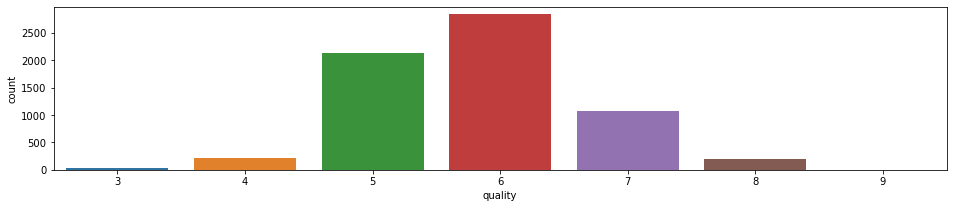

In [9]:
#plot target class distribution 
plt.figure(figsize=(16,3))
sns.countplot(data=data, x='quality')

## The Distribution of Independent Variables 

### Categorical variables

In [10]:
data.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

###  Continuous Variables 
#### Univariate Analysis & Bivariate Analysis

In [11]:
num_vars = data.select_dtypes(include=float).columns

In [12]:
def distplot(col, data): 
    plt.figure(figsize=(16,2))
    
    plt.subplot(1,3,1)
    mean = data[col].mean()
    #histogram
    sns.distplot(data[col], bins=88)
    plt.axvline(mean, 0,1, color='black')
    
    plt.subplot(1,3,2)
    #Boxplot
    sns.boxplot(x=col, data=data)
    
    plt.subplot(1,3,3)
    #violin plot :combines both boxplot and KDE plot
    sns.violinplot(x='quality',y=col,data=data, hue='type',split=True)


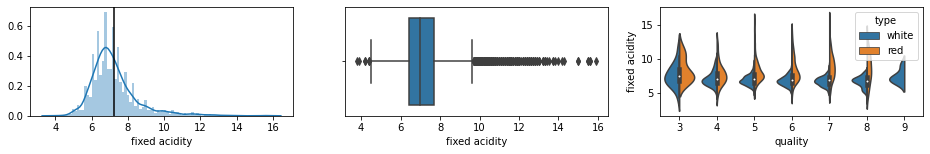

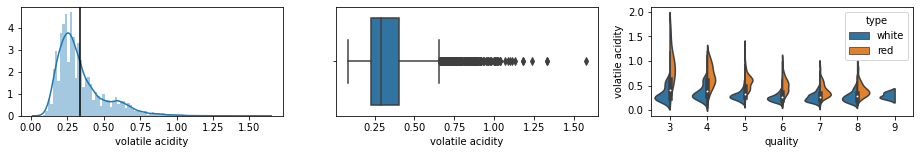

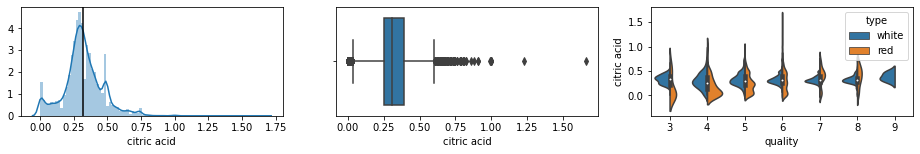

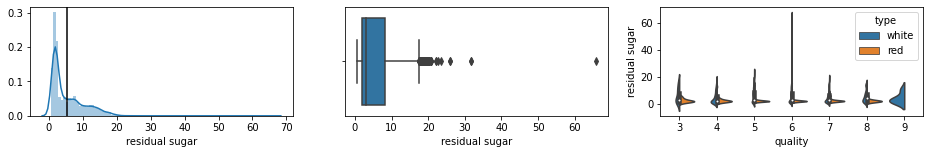

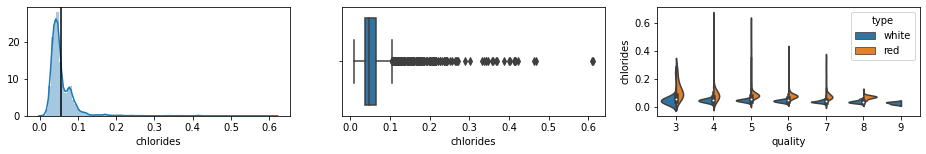

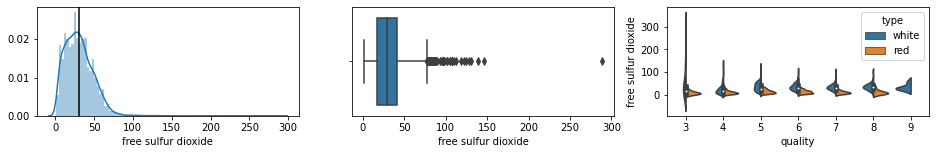

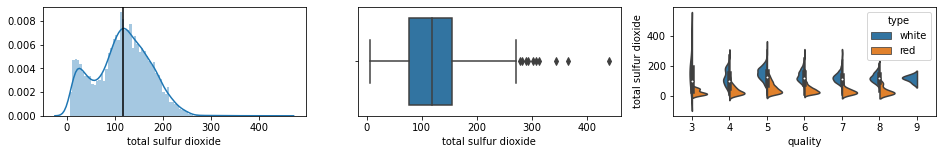

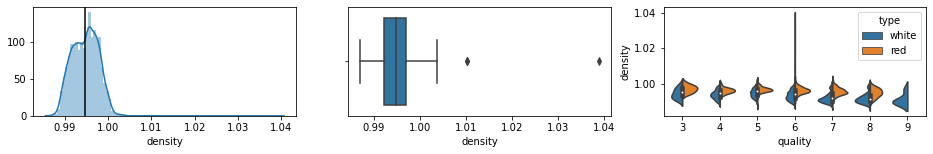

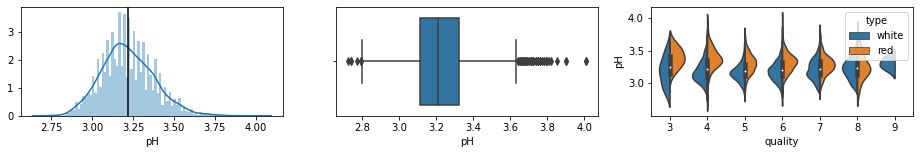

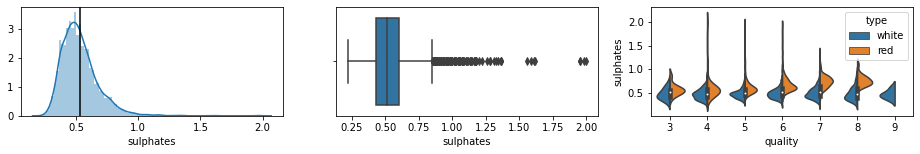

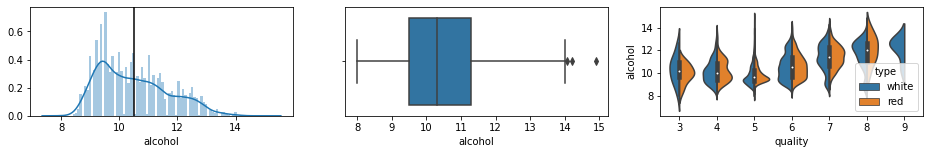

In [13]:
for col in num_vars:
    distplot(col, data)

- To handle :` Outliers + skewed distribution`

## Data Preprocessing

### Handle NaN Values :

In [14]:
data=data.dropna()

In [15]:
#data.isna().sum()

### Handle Outliers:

- **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- **residual sugar**: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**Assumption**: Both Free sulfur dioxide and free sulfur dioxide variables have values that are so far from the other, but this doesn t mean that they are definitely outliers.So an Assumption to check ????

> After a bunch of research, it turns out that effectively they aren't outliers and they are some wines with high free sulfur dioxide and residual sugar values 

In [16]:
#data[data['residual sugar']>50]

In [17]:
#data[data['free sulfur dioxide']>270]

### Encoding categorial variables:

In [18]:
cat_vars = ['type']
enc_cat_vars = pd.get_dummies(data[cat_vars])

In [19]:
data.drop('type', axis=1, inplace=True)

In [20]:
data = pd.concat([enc_cat_vars, data], axis=1)
data.head()

,type_red,type_white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Log Transfromation

- I am not going to perform any log transformation because i will train models that not assume normality like trees algorithms,..

### Correlation Matrix

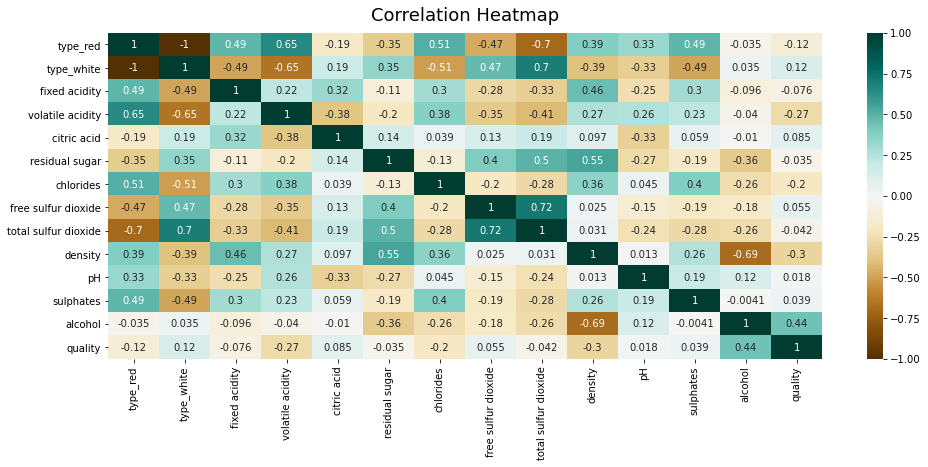

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


## Split the data

In [22]:
X = data.drop('quality', axis=1)
y = data['quality']

## Handle Umbalanced Data

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

> **SMOTE: Synthetic Minority Oversampling Technique**
is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
over_sample = SMOTE(k_neighbors=4)
X, y = over_sample.fit_resample(X,y)

In [25]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    dist = (v/len(y))*100
    print(f'class={k}, n={v} ({dist}%)')

class=6, n=2820 (14.285714285714285%)
class=5, n=2820 (14.285714285714285%)
class=7, n=2820 (14.285714285714285%)
class=8, n=2820 (14.285714285714285%)
class=4, n=2820 (14.285714285714285%)
class=3, n=2820 (14.285714285714285%)
class=9, n=2820 (14.285714285714285%)


### Split the data into Train and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

## Modeling


> After the EDA, i came up that i am dealing with a multiclass classification problem. I've figured out that my data wasn't balanced and i've fixed this issue by SMOTE tech. So based on this data :
- I would use **Standardaridization** because it is much less afected by outliers (wich is the case here i have a lot of values that are so far to the 3rd Standard deviationof each variable)
- I have as Input: numerical variables and as output: categorical(ordinal) variables. So i am going to use **ANOVA t-test** for feature selection in SelectKBest(f_classif) function provided by sckitlearn

- I am going to use **StrafiedKFold** in cross validation


> Some quick notes to take into account
- When the outcome is numeric, and the predictor has more than two levels, the traditional ANOVA F-statistic can be calculated.
- Random Forest Classifiers or Naives Bayes are capabale of handling multiple classes directly
- SVC & LinearClassifier are strictly binary classifier, and it detects if it is a multiclass classification. SVR (One Vs One) and others OvA (One Versus All)
- Classification Accuracy (or misclassification error) makes sense if our class labels are uniformly distributed.
- To use XGBoost main module for a multiclass classification problem, it is needed to change the value of two parameters: objective and num_class.objective: multi:softmax: set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)
- In AdaBoost model i have to specify the hyperparameters algo='SAMME' for multiclass
- For metrics i have to use the average for metrics either by micro or macro or weighted 

> About **ANOVA f-test Feature Selection**:

- ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

- An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.


In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, GridSearchCV, RandomizedSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import confusion_matrix, classification_report,f1_score, recall_score, precision_score, make_scorer, accuracy_score

## Modeling:

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
import xgboost  as xgb

In [31]:
#Creating Pipelines for each model
models_dict = {

'RFC_model' : make_pipeline(
                            SelectKBest(f_classif, k=13),
                            RandomForestClassifier(random_state=0, n_jobs=-1)),

'DTC_model' : make_pipeline(
                            SelectKBest(f_classif, k=13),
                            AdaBoostClassifier(DecisionTreeClassifier(),algorithm='SAMME')),

'SVC_model' : make_pipeline(
                            StandardScaler(),
                            SelectKBest(f_classif, k=13),
                            SVC(C=5,kernel='rbf',gamma=5,degree=3,coef0=1)),

'NB_model'  : make_pipeline(
                            SelectKBest(f_classif, k=13), 
                            GaussianNB()),

'DTC_model' : make_pipeline(
                            SelectKBest(f_classif, k=13), 
                            DecisionTreeClassifier()),

'XGB_model' : make_pipeline(
                            SelectKBest(f_classif, k=13), 
                            xgb.XGBClassifier(objective='multi:softmax',num_class=7))
    
}

In [32]:
def cross_validation_score(model):
    '''
    This function returns the mean of all the validation scores in each KFold 
    '''
    cv = StratifiedKFold(3)
    scores = cross_val_score(model, X_train,y_train, n_jobs=-1, cv=cv, scoring='f1_micro')
    scores = scores.mean()
    return scores

def learning_curves_(mod ):
    '''
    This function plots the learning Curves of any model provided
    '''
    
    cv = StratifiedKFold(3)
    N , train_score, val_score = learning_curve(mod, X_train, y_train,  cv=cv , train_sizes=np.linspace(0.2 ,1.0, 5))

    plt.plot(N, train_score.mean(axis=1), label='Train')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.xlabel('train size')
    plt.legend()

RFC_model: Validation score  0.8613221884498481


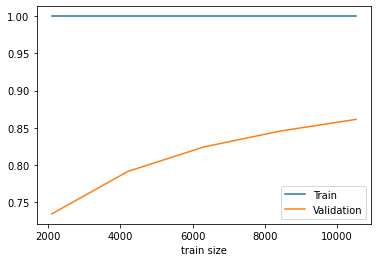

--------------------------------------------------------
DTC_model: Validation score  0.7748226950354611


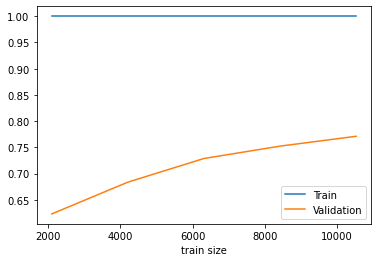

--------------------------------------------------------
SVC_model: Validation score  0.8157294832826746


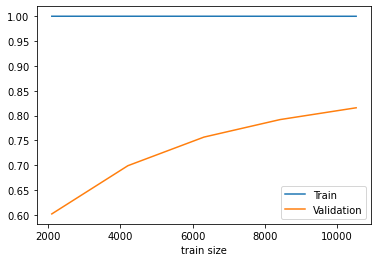

--------------------------------------------------------
NB_model: Validation score  0.3523302938196555


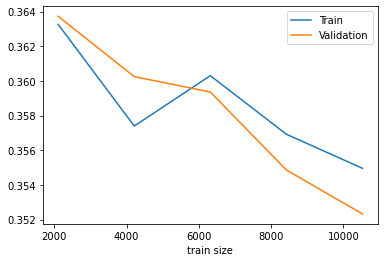

--------------------------------------------------------
XGB_model: Validation score  0.8589159067882473


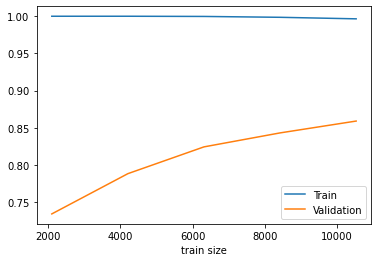

--------------------------------------------------------


In [33]:
# Validation score & learning curves for each model 
for mod_n, mod in models_dict.items():
    print('{}: Validation score  {}'.format(mod_n, cross_validation_score(mod)))
    plt.figure()
    learning_curves_(mod)
    plt.show()
    print('--------------------------------------------------------')

## Random Forest Classifer

In [34]:
RFC_model = make_pipeline(SelectKBest(f_classif, k=13),
                          RandomForestClassifier(random_state=0, n_jobs=-1))

In [35]:
def GridSearch_CV(model, param_grid):
    '''
    This function is nothig but a GridSearchCV, trains models on X_train and y_train and 
    returns the model with best hyperparameters and print the best score and the best parameters
    
    '''
    cv = StratifiedKFold(3)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1_micro')
    
    grid.fit(X_train, y_train)
    model_best_params = grid.best_estimator_
    
    print('best score :', grid.best_score_ )
    print('best params :', grid.best_params_ )
    
    return model_best_params


def RandomizeSearchCV_(model, param_grid) :
    '''
    This function is nothig but a RandomizeSearchCV, trains models on X_train and y_train and 
    returns the model with best hyperparameters and print the best score and the best parameters
    
    '''
    
    cv = StratifiedKFold(3)
    randomSCV = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='f1_micro', random_state=42)

    randomSCV.fit(X_train, y_train)
    model_best_params = randomSCV.best_estimator_
    
    print('best score :', randomSCV.best_score_ )
    print('best params :', randomSCV.best_params_ )
    
    return model_best_params
    

In [36]:
RFC_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'randomforestclassifier', 'selectkbest__k', 'selectkbest__score_func', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [37]:
# inialization of the Hyperparametersto tune
param_grid = {
    
    'selectkbest__k':np.arange(5,14,1),
    'randomforestclassifier__max_depth':np.arange(100,300,50),
    'randomforestclassifier__n_estimators':np.arange(300,500,50)
}

#Tunning Hyperparameters
RFC_model_best_hyp = RandomizeSearchCV_(RFC_model, param_grid)

best score : 0.8778496493928202
best params : {'selectkbest__k': 13, 'randomforestclassifier__n_estimators': 400, 'randomforestclassifier__max_depth': 100}


In [38]:
#train the model
RFC_model_best_hyp.fit(X_train, y_train)
#Predict the X_test
y_pred = RFC_model_best_hyp.predict(X_test)

## Evaluate the Model:

In [51]:
#Confusion Matrix

# color palette from seaborn 
cm = sns.light_palette("green", as_cmap=True) 
  
ct = pd.crosstab(y_test, y_pred)
ct.style.background_gradient(cmap=cm).set_precision(2)


col_0,3,4,5,6,7,8,9
quality,,,,,,,
3,559,0,0,0,0,0,0
4,2,575,7,2,0,0,0
5,3,31,435,76,8,1,0
6,3,14,103,344,78,14,0
7,0,1,4,56,474,26,1
8,0,0,1,0,9,533,0
9,0,0,0,0,0,0,588


In [43]:
#Clasification Report
print(classification_report(y_test, y_pred,labels=[3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       559
           4       0.93      0.98      0.95       586
           5       0.79      0.79      0.79       554
           6       0.72      0.62      0.67       556
           7       0.83      0.84      0.84       562
           8       0.93      0.98      0.95       543
           9       1.00      1.00      1.00       588

    accuracy                           0.89      3948
   macro avg       0.88      0.89      0.88      3948
weighted avg       0.88      0.89      0.89      3948



## Feature Selection:

#### Features Importance

In [59]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
fs.fit(X_train, y_train)

# transform train input data
X_train_fs = fs.transform(X_train)

# transform test input data
X_test_fs = fs.transform(X_test)

# what are scores for the features
for col,i in zip(X.columns,range(len(fs.scores_))):
    print('{}:{}'.format(col, fs.scores_[i]) )


type_red:185.9584749261439
type_white:281.2529483463497
fixed acidity:165.89585689282762
volatile acidity:642.1497473683329
citric acid:214.33502992153063
residual sugar:71.29275023832007
chlorides:613.0803395672074
free sulfur dioxide:103.33675237917998
total sulfur dioxide:24.93348405708383
density:1032.8383659489234
pH:113.97919175321192
sulphates:95.76020414149242
alcohol:1950.8990939769055


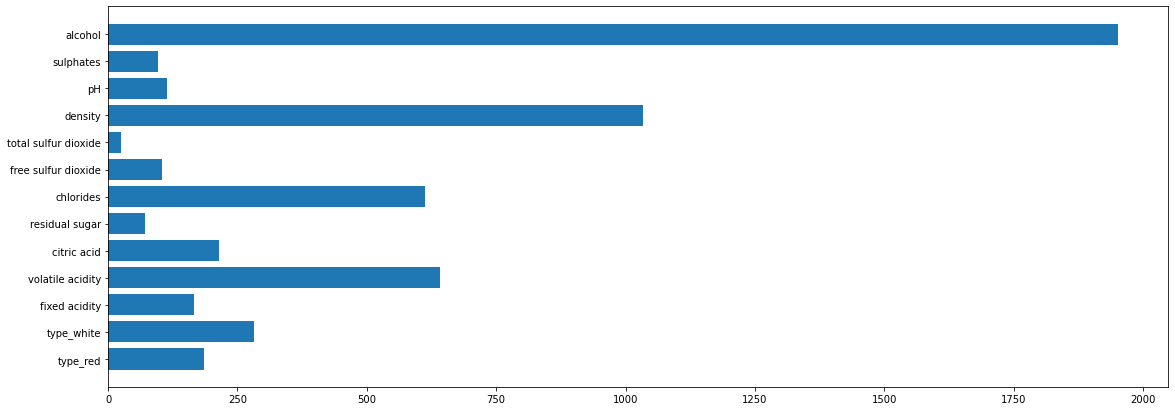

In [67]:
# plot the scores
plt.figure(figsize=(19,7))
plt.barh([j for j in X.columns], fs.scores_)
plt.show()